In [1]:
import sys, os

# Notebook 位于 pythontrade/notebooks，project_root 才是 pythontrade
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# 把 project_root 加到模块搜索路径
sys.path.insert(0, project_root)

print(sys.path[0])   # 应该打印 …/pythontrade

# 现在可以这样导入：
from src.data.loader import fetch_ohlcv

c:\Users\Andy\PythonTrade


In [2]:
from src.data.loader import fetch_ohlcv
df = fetch_ohlcv("BTC/USDT", "1h")
df.head()

,open,high,low,close,volume
timestamp,,,,,
2020-01-01 00:00:00,7195.24,7196.25,7175.46,7177.02,511.814901
2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,883.052603
2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809
2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,783.724867
2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,467.812578


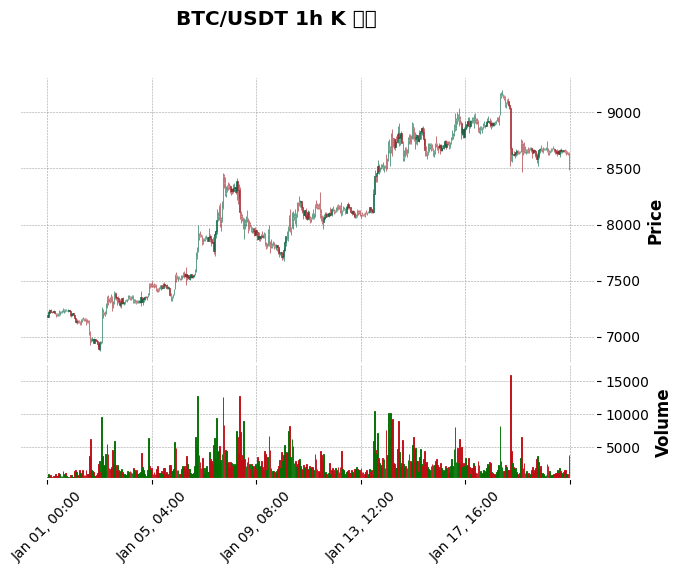

In [3]:
import mplfinance as mpf
import warnings


warnings.filterwarnings("ignore", message="Glyph .* missing from font")
# 画 1h K 线＋成交量
mpf.plot(
    df,
    type="candle",
    volume=True,
    title="BTC/USDT 1h K 线图",
    style="charles"          # 可选主题
)

<Axes: title={'center': 'EMA(5/20) 对比收盘价'}, xlabel='timestamp'>

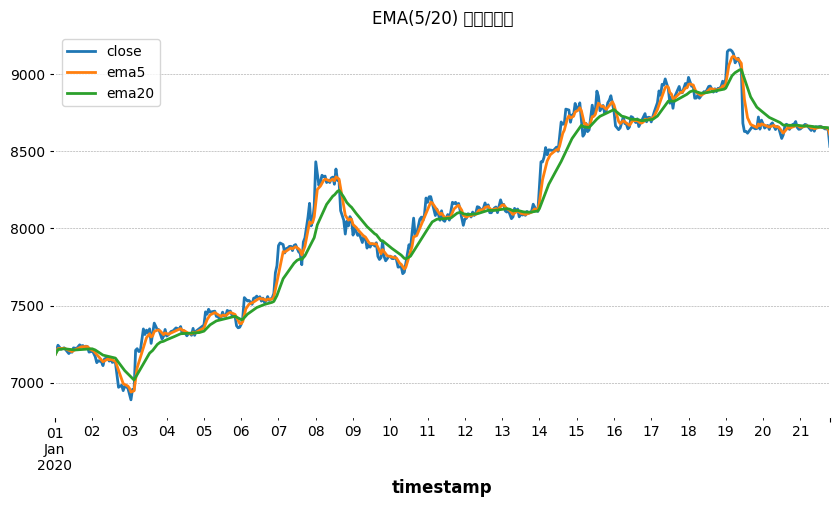

In [4]:
# 先计算两个 EMA
df["ema5"]  = df["close"].ewm(span=5).mean()
df["ema20"] = df["close"].ewm(span=20).mean()

# 然后画折线
df[["close","ema5","ema20"]].plot(
    title="EMA(5/20) 对比收盘价",
    figsize=(10, 5),
    legend=True
)

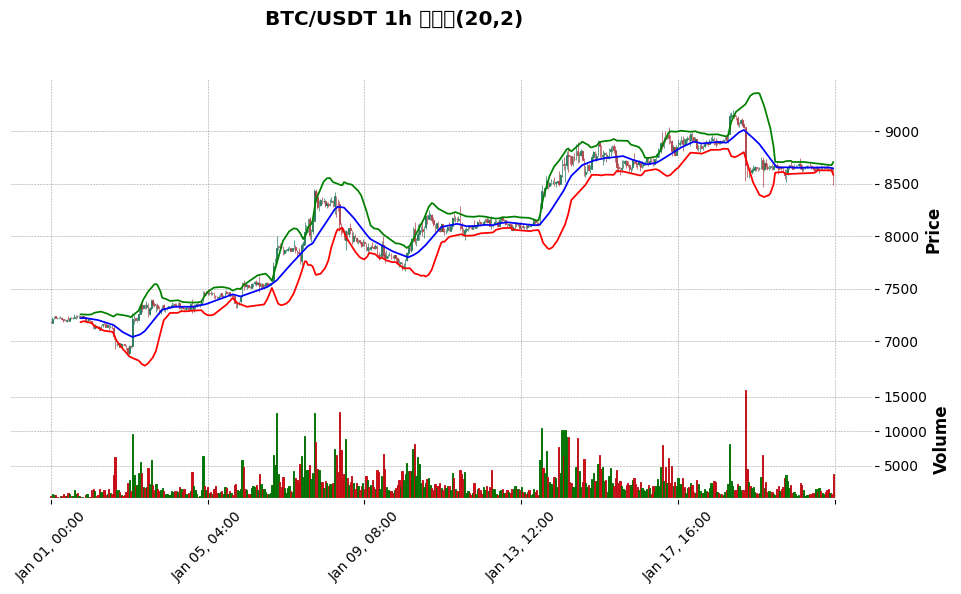

In [5]:
import pandas as pd
import mplfinance as mpf

# 假设你已经有 df
# df = fetch_ohlcv("BTC/USDT", "1h")

# 1. 计算布林带
window = 20
std_factor = 2

df["middle"] = df["close"].rolling(window=window).mean()
df["std"]    = df["close"].rolling(window=window).std()
df["upper"]  = df["middle"] + std_factor * df["std"]
df["lower"]  = df["middle"] - std_factor * df["std"]

# 2. 用 mplfinance 画 K 线并叠加布林带
ap = [
    mpf.make_addplot(df["upper"], color="g"),
    mpf.make_addplot(df["middle"], color="b"),
    mpf.make_addplot(df["lower"], color="r"),
]

mpf.plot(
    df,
    type="candle",
    volume=True,
    addplot=ap,
    title=f"BTC/USDT 1h 布林带({window},{std_factor})",
    style="charles",
    figsize=(12,6)
)

In [6]:
from src.data.loader import fetch_ohlcv

df = fetch_ohlcv("BTC/USDT", "1h")
print(df.head())

                        open     high      low    close      volume
timestamp                                                          
2020-01-01 00:00:00  7195.24  7196.25  7175.46  7177.02  511.814901
2020-01-01 01:00:00  7176.47  7230.00  7175.71  7216.27  883.052603
2020-01-01 02:00:00  7215.52  7244.87  7211.41  7242.85  655.156809
2020-01-01 03:00:00  7242.66  7245.00  7220.00  7225.01  783.724867
2020-01-01 04:00:00  7225.00  7230.00  7215.03  7217.27  467.812578


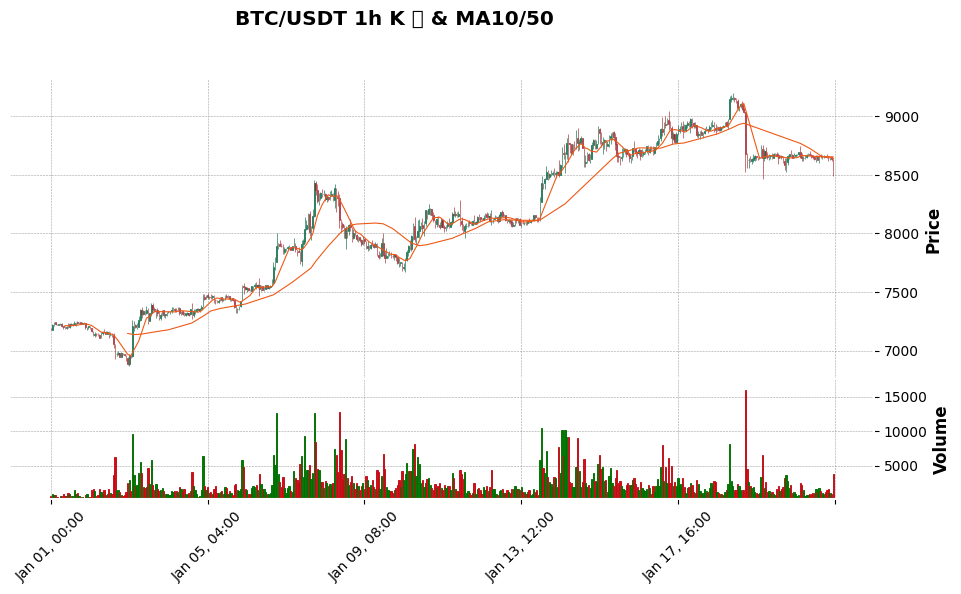

In [7]:
# 如果还没安装 mplfinance，先运行一次：
# pip install mplfinance

import mplfinance as mpf
import pandas as pd
from src.config import DATA_DIR

# 1. 读取已经落盘的 1h 数据
df = pd.read_parquet(DATA_DIR / "BTC_USDT_1h.parquet")

# 2. 用 mplfinance 一步绘制 蜡烛图 + MA10/MA50 + 成交量
mpf.plot(
    df,
    type="candle",        # 蜡烛图
    mav=(10, 50),         # 同时画 10 日和 50 日移动均线
    volume=True,          # 显示成交量
    title="BTC/USDT 1h K 线 & MA10/50",
    style="charles",
    figsize=(12, 6)
)

In [8]:
# from src.data.loader_equities import fetch_stock_ohlcv
# import pandas as pd

# # 拉取苹果近一年的日线
# df = fetch_stock_ohlcv("AAPL", period="1y", interval="1d")

# # 看前几行
# df.head()

# # 画收盘价折线
# df["close"].plot(title="AAPL 日线 收盘价", figsize=(10,4))

In [9]:
import sys


<Axes: title={'center': 'AAPL 日线 收盘价'}, xlabel='timestamp'>

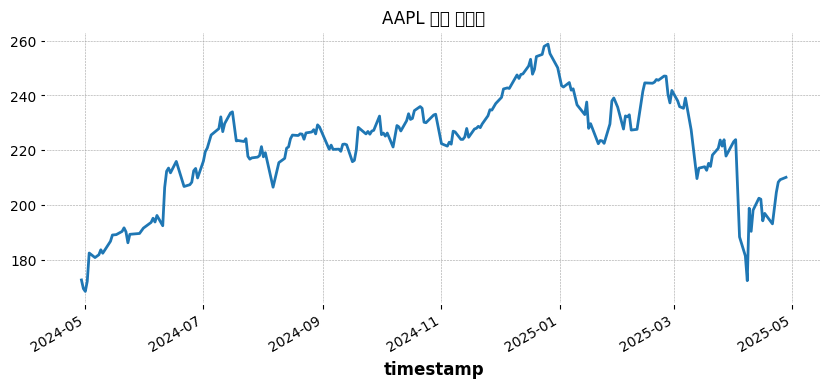

In [10]:
from src.data.loader_equities import fetch_stock_ohlcv
import pandas as pd

# 拉取苹果近一年的日线
df = fetch_stock_ohlcv("AAPL", period="1y", interval="1d")

# 看前几行
df.head()

# 画收盘价折线
df["close"].plot(title="AAPL 日线 收盘价", figsize=(10,4))